In [111]:
import os
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.metrics import mean_squared_error

# Load preprocessed training data and labels
x_train = np.load("preprocessed_dataset/train/X_train.npy")
y_train = np.load("preprocessed_dataset/train/y_train.npy")

# Load preprocessed validation data and labels
x_test = np.load("preprocessed_dataset/validation/X_val.npy")
y_test = np.load("preprocessed_dataset/validation/y_val.npy")


22


In [112]:
a=4
b=11
n=200 # number of samples
delta=8/255 #noise level
delta2=1*delta
aug=10

In [113]:
# Choose the labels 'a' and 'b'
label_1 = a  # Replace with the actual label you want to extract
label_2 = b  # Replace with the actual label you want to extract

# Filter training set
mask_train_1 = (y_train == label_1)
mask_train_2 = (y_train == label_2)
mask_train = np.logical_or(mask_train_1, mask_train_2)

trainx = x_train[mask_train]
trainy = y_train[mask_train]

# Assign values -1 for label 'a' and 1 for label 'b'
trainy= np.where(trainy == label_1, -1, 1)

# Filter test set
mask_test_1 = (y_test == label_1)
mask_test_2 = (y_test == label_2)
mask_test = np.logical_or(mask_test_1, mask_test_2)

testx = x_test[mask_test]
testy = y_test[mask_test]

# Assign values -1 for label 'a' and 1 for label 'b'
testy = np.where(testy == label_1, -1, 1)

# Flatten each image in the extracted sets
trainx= trainx.reshape((len(trainx), -1))
testx = testx.reshape((len(testx), -1))

# Print the shapes of the extracted and flattened sets
print("Shape of x_train_ab_flat:", trainx.shape)
print("Shape of y_train_ab:", trainy.shape)
print("Shape of x_test_ab_flat:", testx.shape)
print("Shape of y_test_ab:", testy.shape)


Shape of x_train_ab_flat: (1000, 12288)
Shape of y_train_ab: (1000,)
Shape of x_test_ab_flat: (100, 12288)
Shape of y_test_ab: (100,)


In [114]:
# Ensure n is even, adjust if needed
n = n if n % 2 == 0 else n + 1

# Get the indices of the samples for label 'a'
indices_label_a = np.where(trainy == -1)[0][:int(n/2)]

# Get the indices of the samples for label 'b'
indices_label_b = np.where(trainy == 1)[0][:int(n/2)]

# Combine the selected indices
selected_indices = np.concatenate([indices_label_a, indices_label_b])

# Extract the sampled data points
x_train_sampled = trainx[selected_indices]
y_train_sampled = trainy[selected_indices]

# Print the shapes of the sampled and flattened set
print("Shape of x_train_sampled_flat:", x_train_sampled.shape)
print("Shape of y_train_sampled:", y_train_sampled.shape)


Shape of x_train_sampled_flat: (200, 12288)
Shape of y_train_sampled: (200,)


In [115]:
train1=x_train_sampled
ytrain1=y_train_sampled
test1=testx
Ytest=testy

z=[10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2)]

In [116]:
def Ker(X,Y):
    x=np.sum(np.square(X),axis=1)
    y=np.sum(np.square(Y),axis=1)
    x=x.reshape(len(x),1)
    y=y.reshape(len(y),1)
    temp1=x.repeat(len(y),axis=1)
    temp2=y.repeat(len(x),axis=1)
    squ=temp1+np.transpose(temp2)-2*np.matmul(X,np.transpose(Y))
    epsilon = 1e-8
    #squ = np.sqrt(np.maximum(squ, epsilon))
    mat=np.exp(-squ/200)  # kernel bandwith 1,100,200,784
    return mat

In [117]:
error=[]
for R in z:
    print('R=',R)
    MIS=np.zeros(10)
    for a in range(10):
        P=np.random.normal(0,1,size=(aug,len(train1),12288))
        temp2=train1+delta*P
        temp2=np.array([temp2]).reshape(aug*len(train1), 12288)
    
        train = temp2 #augmentation training set
        prediction=np.zeros((10,1,100))
        for j in range(10):
            N=np.random.normal(0,1,size=(len(test1),12288))
            test=test1+delta2*N
            Ytrain=np.tile(ytrain1,aug)
            b=Ker(test,train)
            k1=Ker(train,train)
            n=len(Ytest)
            m=len(train)
            I2=np.identity(m)
        
            k2=np.matrix(k1)+m*R*I2



            k_inv=np.linalg.inv(k2)


            Y=Ytrain.reshape(len(Ytrain),1)
            temp1=np.matmul(b,k_inv)
            temp2=np.matmul(temp1,Y)

         
            y_pred1=temp2
            y_pred2=np.ravel(y_pred1)
            te = np.where(y_pred2<0, -np.ones_like(y_pred2), np.ones_like(y_pred2))
            
            prediction[j,0,:]=te

        predictions = prediction.reshape((10, 100))
        y2=np.tile(Ytest,(10,1))
        err=np.transpose(y2-predictions)

        ze=np.all(err == 0 , axis=1)

        count=np.sum(ze)

        err2=count/err.shape[0]
        #print(1-err2)
        MIS[a]=1-err2
    error.append(np.mean(MIS))

R= 1e-08
R= 1e-07
R= 1e-06
R= 1e-05
R= 0.0001
R= 0.001
R= 0.01


In [118]:
#no augmented error

error2=[]

for R in z:
    prediction2=np.zeros((10,1,100))
    for a in range(10):
        N=np.random.normal(0,1,size=(len(test1),12288))
        test=test1+delta2*N
        B_1=Ker(test,train1)
        K_1=Ker(train1,train1)

        M=len(train1)
        I_2=np.identity(M)

        K_2=np.matrix(K_1)+M*R*I_2



        Kinv=np.linalg.inv(K_2)
        Y=ytrain1.reshape(len(ytrain1),1)
        temp1=np.matmul(B_1,Kinv)
        temp2=np.matmul(temp1,Y)

        y_bar=np.average(Ytest)

        ybar=np.multiply(np.ones(n),y_bar)
        num=0
        den=0
        y_pred1=temp2
        y_pred2=np.ravel(y_pred1)
        te = np.where(y_pred2<0, -np.ones_like(y_pred2), np.ones_like(y_pred2))
  
        prediction2[a,0,:]=te
    prediction2 = prediction2.reshape((10, 100))
    y2=np.tile(Ytest,(10,1))
    err=np.transpose(y2-prediction2)


    ze2=np.all(err == 0 , axis=1)
    count2=np.sum(ze2)

    err2=count2/err.shape[0]

    MIS=1-err2

    error2.append(MIS)


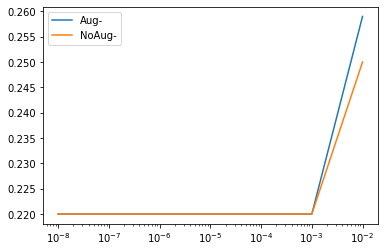

In [119]:
plt.semilogx(z,error,label='Aug-')
plt.semilogx(z,error2,label='NoAug-')
plt.legend()
plt.show()


In [120]:
print(error)
print(error2)

[0.21999999999999997, 0.21999999999999997, 0.21999999999999997, 0.21999999999999997, 0.21999999999999997, 0.21999999999999997, 0.259]
[0.21999999999999997, 0.21999999999999997, 0.21999999999999997, 0.21999999999999997, 0.21999999999999997, 0.21999999999999997, 0.25]
